# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

In [8]:
import pandas as pd
from autogluon.tabular import TabularPredictor
from autogluon.common import space

In [2]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv(
    'data/train.csv',
    parse_dates=['datetime'],
    usecols=lambda col: col not in ["casual", "registered"]
)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


In [4]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454


In [3]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv(
    'data/test.csv',
    parse_dates=['datetime']
)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
# Same thing as train and test dataset
submission = pd.read_csv(
    'data/sampleSubmission.csv'
)
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
predictor = TabularPredictor(
    label='count',
    problem_type='regression',
    eval_metric='root_mean_squared_error'
).fit(
    train,
    time_limit=600,
    presets='best_quality'
)

### Review AutoGluon's training run with ranking of models that did the best.

In [13]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-115.867393,root_mean_squared_error,11.309278,409.303818,0.000571,0.029586,3,True,12
1,CatBoost_BAG_L2,-116.277247,root_mean_squared_error,10.363369,323.829851,0.048067,27.192748,2,True,11
2,LightGBMXT_BAG_L2,-116.312113,root_mean_squared_error,10.542280,319.404707,0.226977,22.767605,2,True,8
3,LightGBM_BAG_L2,-116.624567,root_mean_squared_error,10.395316,318.710508,0.080014,22.073406,2,True,9
4,RandomForestMSE_BAG_L1,-117.196514,root_mean_squared_error,0.399762,6.891650,0.399762,6.891650,1,True,3
5,WeightedEnsemble_L2,-117.196514,root_mean_squared_error,0.400441,6.910843,0.000679,0.019193,2,True,7
6,RandomForestMSE_BAG_L2,-119.052440,root_mean_squared_error,10.953649,337.240473,0.638347,40.603370,2,True,10
7,ExtraTreesMSE_BAG_L1,-124.600676,root_mean_squared_error,0.550796,7.774198,0.550796,7.774198,1,True,5
8,CatBoost_BAG_L1,-130.601011,root_mean_squared_error,0.160427,148.098185,0.160427,148.098185,1,True,4
9,LightGBM_BAG_L1,-131.054162,root_mean_squared_error,1.587899,27.272861,1.587899,27.272861,1,True,2


### Create predictions from test dataset

In [12]:
predictions = predictor.predict(test)
predictions.head()

0    83.352905
1    82.207420
2    82.207420
3    93.084885
4    93.084885
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      219.942200
std       126.896164
min        15.346541
25%       120.885475
50%       196.338745
75%       303.705933
max       629.325684
Name: count, dtype: float64

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("data/submissions/submission.csv", index=False)

#### Initial score of `1.42564`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'count'}>, <Axes: >, <Axes: >]],
      dtype=object)

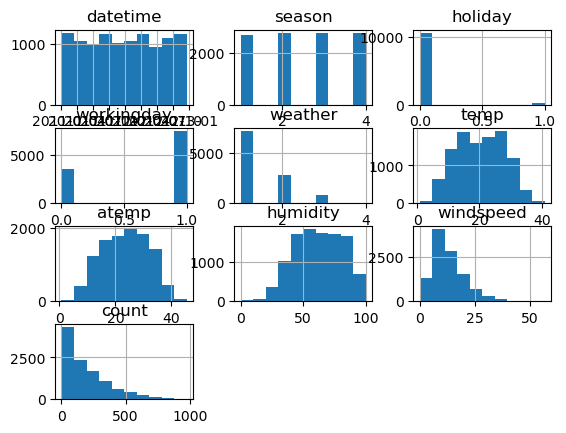

In [8]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [5]:
# create a new feature
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
train['day_of_week'] = train['datetime'].dt.dayofweek

test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month
test['day_of_week'] = test['datetime'].dt.dayofweek

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [6]:
train["season"] = train['season'].astype('category')
train["weather"] = train["weather"].astype('category')

test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [7]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,day_of_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,1,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,1,1,5


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day_of_week'}>,
        <Axes: title={'center': 'hour'}>]], dtype=object)

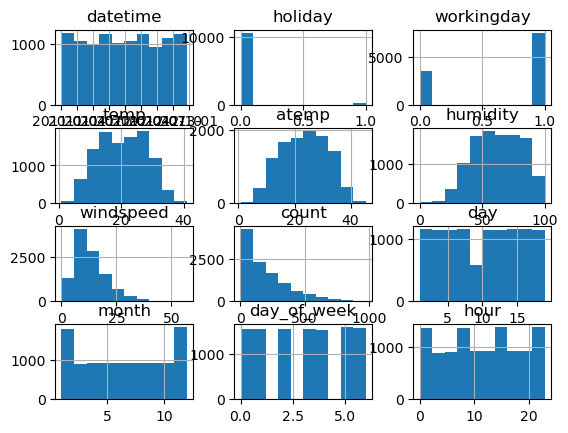

In [19]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(
    label='count',
    problem_type='regression',
    eval_metric='root_mean_squared_error'
).fit(
    train,
    time_limit=600,
    presets='best_quality'
)

In [21]:
predictor_new_features.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-32.054669,root_mean_squared_error,29.278828,368.106991,0.000653,0.041496,3,True,11
1,WeightedEnsemble_L2,-32.329896,root_mean_squared_error,27.192442,254.006966,0.000833,0.020897,2,True,6
2,CatBoost_BAG_L2,-32.504254,root_mean_squared_error,28.131163,307.069067,0.175322,43.825793,2,True,10
3,LightGBM_BAG_L2,-32.609535,root_mean_squared_error,28.058928,287.106798,0.103087,23.863524,2,True,8
4,RandomForestMSE_BAG_L2,-32.857472,root_mean_squared_error,28.999767,300.376179,1.043925,37.132904,2,True,9
5,LightGBMXT_BAG_L2,-33.282545,root_mean_squared_error,28.248929,288.572956,0.293087,25.329681,2,True,7
6,LightGBM_BAG_L1,-33.916920,root_mean_squared_error,3.616930,38.253048,3.616930,38.253048,1,True,2
7,LightGBMXT_BAG_L1,-34.509285,root_mean_squared_error,22.541035,81.676679,22.541035,81.676679,1,True,1
8,CatBoost_BAG_L1,-34.725906,root_mean_squared_error,0.163493,116.492947,0.163493,116.492947,1,True,4
9,ExtraTreesMSE_BAG_L1,-38.337621,root_mean_squared_error,0.764232,9.257205,0.764232,9.257205,1,True,5


In [22]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    13.928254
1     4.062748
2     3.053611
3     3.143682
4     3.099189
Name: count, dtype: float32

In [27]:
predictions_new_features.describe()

count    6493.000000
mean      191.176285
std       173.537277
min         0.000000
25%        46.787025
50%       149.527023
75%       281.645569
max       889.999512
Name: count, dtype: float64

In [26]:
predictions_new_features[predictions_new_features < 0] = 0

In [29]:
# Same submitting predictions
submission_new_features = pd.read_csv(
    'data/sampleSubmission.csv'
)
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("data/submissions/submission_new_features.csv", index=False)

#### New Score of `0.47215`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
predictor_new_hpo = TabularPredictor(
    label='count',
    problem_type='regression',
    eval_metric='root_mean_squared_error'
).fit(
    train,
    time_limit=600,
    presets='best_quality_v150',
    hyperparameters={
        'GBM': {
            'num_leaves': space.Int(16, 256),
            'learning_rate': space.Real(0.005, 0.1, log=True),
            'feature_fraction': space.Real(0.6, 1.0),
            'min_data_in_leaf': space.Int(5, 100),
            'max_depth': space.Int(-1, 16),
            'lambda_l1': space.Real(1e-8, 10, log=True),
            'lambda_l2': space.Real(1e-8, 10, log=True),
        },
        'CAT': {
            'learning_rate': space.Real(0.005, 0.1, log=True),
            'depth': space.Int(4, 10),
            'l2_leaf_reg': space.Real(1, 20),
            'border_count': space.Int(32, 255),
        },
    },
    hyperparameter_tune_kwargs={
        'num_trials': 50,
        'searcher': 'bayes',
        'scheduler': 'local'
    }
)

In [12]:
predictor_new_hpo.leaderboard(silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-33.816291,root_mean_squared_error,53.503274,204.142476,0.000876,0.028124,2,True,4
1,LightGBM_BAG_L1/T2,-34.258439,root_mean_squared_error,27.239875,104.468106,27.239875,104.468106,1,True,2
2,LightGBM_BAG_L1/T1,-35.939851,root_mean_squared_error,26.262523,99.646246,26.262523,99.646246,1,True,1
3,CatBoost_BAG_L1/T1,-49.842159,root_mean_squared_error,0.124748,228.142880,0.124748,228.142880,1,True,3


In [13]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    14.732739
1    -4.083511
2    -5.411551
3    -0.575470
4    -1.289628
Name: count, dtype: float32

In [14]:
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [15]:
# Same submitting predictions
submission_new_hpo = pd.read_csv(
    'data/sampleSubmission.csv'
)
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("data/submissions/submission_new_hpo.csv", index=False)

#### New Score of `0.61785`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

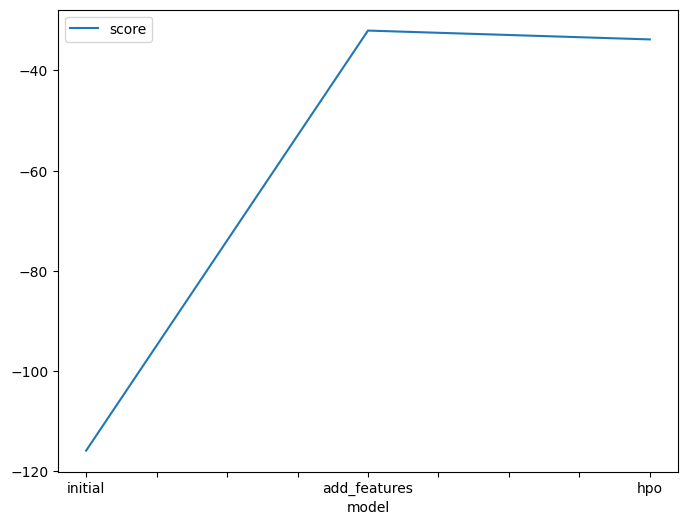

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-115.867393, -32.054669, -33.816291]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_train_score.png')

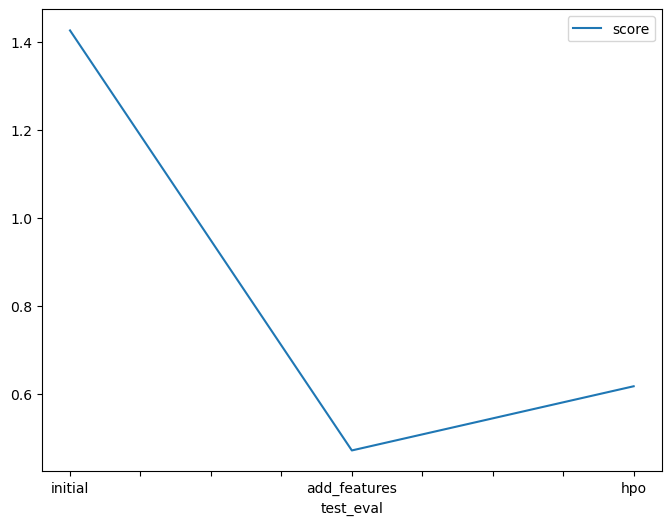

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.42564, 0.47215, 0.61785]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_test_score.png')

Not sure how to present hyperparameter data, as in the last run the model was tunned across a range of hyperparameters at the same time.